# Artificial Neural Networks with Keras

#### 1. Perceptron

![](https://miro.medium.com/v2/resize:fit:1400/1*n6sJ4yZQzwKL9wnF5wnVNg.png)

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [28]:
iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0)

In [30]:

per_clf=Perceptron()
per_clf.fit(X,y)

per_clf.predict([[1,.5]])

array([ True])

In [38]:
import tensorflow as tf
import keras

In [39]:
tf.__version__

'2.15.0'

In [40]:
keras.__version__

'2.15.0'

#### 2. Multilayer Perceptron (Classification on Fashion MNIST Dataset)

![](https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png)

In [41]:
fashion_mnist=keras.datasets.fashion_mnist

In [42]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [177]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [179]:
X_train_full.shape

(60000, 28, 28)

In [180]:
y_train_full.shape

(60000,)

In [181]:
X_test.shape

(10000, 28, 28)

In [182]:
y_test.shape

(10000,)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

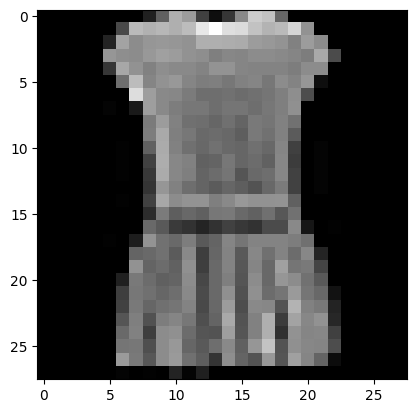

In [178]:
image = X_train_full[3]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [145]:
X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:54000]/255.0
y_valid, y_train=y_train_full[:5000],y_train_full[5000:54000]

In [146]:
X_train.shape

(49000, 28, 28)

In [147]:
X_valid.shape

(5000, 28, 28)

In [148]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [183]:
class_names[y_train_full[3]]

'Dress'

In [184]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [185]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
model.layers

In [153]:
weights, biases=model.layers[1].get_weights()

In [186]:
weights

array([[ 0.00461905, -0.03839632,  0.01537044, ..., -0.00854383,
        -0.00961185, -0.03432111],
       [-0.02585558,  0.04063921, -0.06579894, ...,  0.02366646,
        -0.06885826, -0.02236181],
       [-0.03024741, -0.05206218,  0.06646113, ...,  0.0089756 ,
         0.04320583, -0.04595651],
       ...,
       [-0.03982868,  0.00224239,  0.00067526, ..., -0.06011513,
        -0.04962067, -0.05647521],
       [ 0.04108696, -0.04728068, -0.06717858, ..., -0.06355821,
         0.05640616,  0.02776309],
       [ 0.05424257, -0.05051976,  0.04078747, ..., -0.02763535,
        -0.06453113,  0.04836854]], dtype=float32)

In [155]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [187]:
weights.shape

(784, 300)

In [188]:
biases.shape

(300,)

In [189]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [202]:
history=model.fit(X_train,y_train, epochs=60,validation_data=(X_valid,y_valid), batch_size=32)

Epoch 1/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1203 - accuracy: 0.9536 - val_loss: 0.4626 - val_accuracy: 0.8958
Epoch 2/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1163 - accuracy: 0.9552 - val_loss: 0.4751 - val_accuracy: 0.9008
Epoch 3/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1194 - accuracy: 0.9546 - val_loss: 0.4640 - val_accuracy: 0.8964
Epoch 4/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1126 - accuracy: 0.9565 - val_loss: 0.4746 - val_accuracy: 0.8956
Epoch 5/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9572 - val_loss: 0.4880 - val_accuracy: 0.8916
Epoch 6/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1074 - accuracy: 0.9597 - val_loss: 0.4949 - val_accuracy: 0.8932
Epoch 7/60
1532/1532 [==============================] - 2s 1ms/step - loss: 0.1075 - accuracy: 0.9589 - val_loss: 0.5061 - val_accuracy:

In [203]:
history.params

{'verbose': 1, 'epochs': 60, 'steps': 1532}

In [213]:
model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 0s 581us/step - loss: 1.0255 - accuracy: 0.8779


[1.025470495223999, 0.8779000043869019]

In [204]:
model.predict(X_train[3:4])

1/1 [==============================] - 0s 14ms/step


array([[6.2605668e-22, 2.1926591e-36, 1.9778595e-21, 6.2483478e-38,
        1.6459982e-25, 7.0600454e-17, 3.6967403e-26, 5.0601538e-19,
        1.4741959e-27, 1.0000000e+00]], dtype=float32)

In [205]:
predict=model.predict(X_train[3:4])

1/1 [==============================] - 0s 13ms/step


In [206]:
np.argmax(predict[0])

9

In [207]:
class_names[np.argmax(predict[0])]

'Ankle Boot'

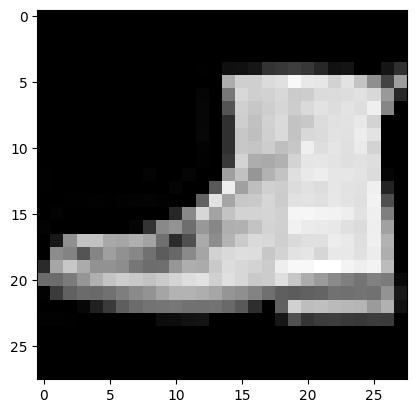

In [208]:
image = X_train_full[5003]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [209]:
import pandas as pd

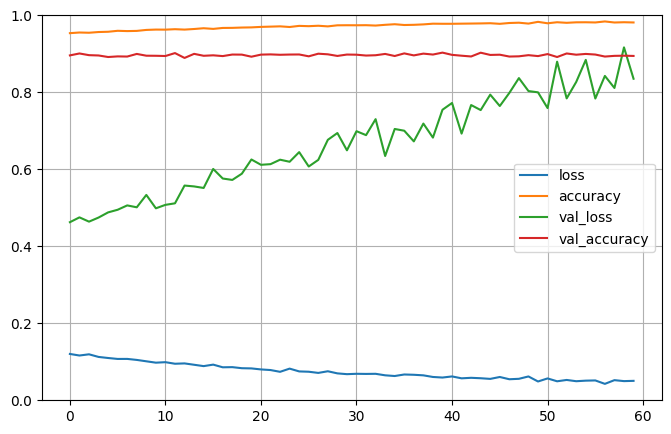

In [210]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### 3. Multilayer Perceptron (Regression on California Housing Dataset)

In [214]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [215]:
housing=fetch_california_housing()

In [238]:
X_train_full, X_test, y_train_full, y_test=train_test_split(housing.data,housing.target, test_size=.2, random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, test_size=.3, random_state=43)

In [239]:
X_train_full.shape

(16512, 8)

In [240]:
X_test.shape

(4128, 8)

In [241]:
X_train.shape

(11558, 8)

In [242]:
X_valid.shape

(4954, 8)

In [243]:
scaler=StandardScaler()

In [244]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [273]:
model=keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(1)
])

In [274]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 300)               2700      
                                                                 
 dense_27 (Dense)            (None, 100)               30100     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 32901 (128.52 KB)
Trainable params: 32901 (128.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [275]:
model.compile(loss="mse", optimizer="sgd",metrics=tf.keras.metrics.RootMeanSquaredError())

In [276]:
history=model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
362/362 [==============================] - 0s 913us/step - loss: 0.9882 - root_mean_squared_error: 0.9941 - val_loss: 0.5887 - val_root_mean_squared_error: 0.7672
Epoch 2/30
362/362 [==============================] - 0s 734us/step - loss: 0.8671 - root_mean_squared_error: 0.9312 - val_loss: 0.4375 - val_root_mean_squared_error: 0.6614
Epoch 3/30
362/362 [==============================] - 0s 725us/step - loss: 0.4355 - root_mean_squared_error: 0.6599 - val_loss: 0.4011 - val_root_mean_squared_error: 0.6333
Epoch 4/30
362/362 [==============================] - 0s 724us/step - loss: 0.4100 - root_mean_squared_error: 0.6403 - val_loss: 0.3821 - val_root_mean_squared_error: 0.6182
Epoch 5/30
362/362 [==============================] - 0s 726us/step - loss: 0.3936 - root_mean_squared_error: 0.6274 - val_loss: 0.3908 - val_root_mean_squared_error: 0.6252
Epoch 6/30
362/362 [==============================] - 0s 697us/step - loss: 0.3828 - root_mean_squared_error: 0.6187 - val_loss: 0

In [277]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 391us/step - loss: 0.3166 - root_mean_squared_error: 0.5627


[0.31661275029182434, 0.5626835227012634]

In [278]:
model.predict(X_test[3:4])

1/1 [==============================] - 0s 30ms/step


array([[2.4561083]], dtype=float32)

In [279]:
y_test[3:4]

array([2.186])

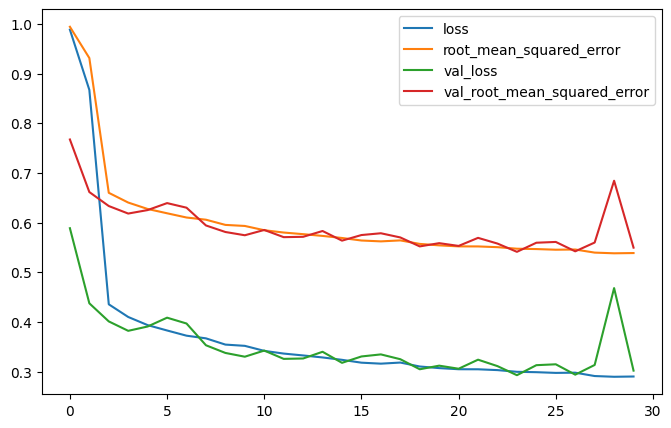

In [280]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

#### 4. Keras Functional API

In [281]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden_1=keras.layers.Dense(300, activation="relu")(input_)
hidden_2=keras.layers.Dense(100, activation="relu")(hidden_1)
concat=keras.layers.Concatenate()([input_,hidden_2])
output=keras.layers.Dense(1,activation="relu")(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [283]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_29 (Dense)            (None, 300)                  2700      ['input_1[0][0]']             
                                                                                                  
 dense_30 (Dense)            (None, 100)                  30100     ['dense_29[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 108)                  0         ['input_1[0][0]',             
                                                                     'dense_30[0][0]']        

In [284]:
model.compile(loss="mse",optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError()])

__CallBacks__

In [288]:
checkpoint=keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

In [289]:
early_stopping=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [290]:
history=model.fit(X_train,y_train, epochs=300, validation_data=(X_valid,y_valid), callbacks=[checkpoint,early_stopping])

Epoch 1/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2590 - root_mean_squared_error: 0.5089 - val_loss: 0.2651 - val_root_mean_squared_error: 0.5149
Epoch 2/300
191/362 [==============>...............] - ETA: 0s - loss: 0.2597 - root_mean_squared_error: 0.5096

/Users/kim/Desktop/Github/KerasTF/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


362/362 [==============================] - 0s 1ms/step - loss: 0.2606 - root_mean_squared_error: 0.5105 - val_loss: 0.2771 - val_root_mean_squared_error: 0.5264
Epoch 3/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2518 - root_mean_squared_error: 0.5018 - val_loss: 0.2721 - val_root_mean_squared_error: 0.5217
Epoch 4/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2491 - root_mean_squared_error: 0.4991 - val_loss: 0.2707 - val_root_mean_squared_error: 0.5203
Epoch 5/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2488 - root_mean_squared_error: 0.4988 - val_loss: 0.2725 - val_root_mean_squared_error: 0.5220
Epoch 6/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2475 - root_mean_squared_error: 0.4975 - val_loss: 0.2645 - val_root_mean_squared_error: 0.5143
Epoch 7/300
362/362 [==============================] - 0s 1ms/step - loss: 0.2487 - root_mean_squared_error: 0.4987 - val_loss: 0.2842 - val_root_m

<function matplotlib.pyplot.show(close=None, block=None)>

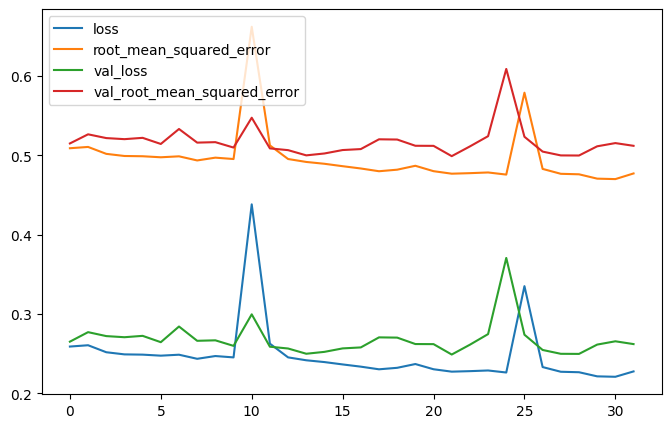

In [291]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show

In [292]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 462us/step - loss: 0.2582 - root_mean_squared_error: 0.5081


[0.25818195939064026, 0.5081160664558411]

#### 5. Using TensorBoard

In [293]:
import os
log_dir=os.path.join(os.curdir,"logs")

In [294]:
def run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(log_dir, run_id)

In [301]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir())

In [305]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
362/362 [==============================] - 0s 1ms/step - loss: 0.1712 - root_mean_squared_error: 0.4137 - val_loss: 0.2712 - val_root_mean_squared_error: 0.5207
Epoch 2/30
362/362 [==============================] - 0s 1ms/step - loss: 0.1785 - root_mean_squared_error: 0.4224 - val_loss: 0.2651 - val_root_mean_squared_error: 0.5149
Epoch 3/30
362/362 [==============================] - 0s 1ms/step - loss: 0.1755 - root_mean_squared_error: 0.4189 - val_loss: 0.2686 - val_root_mean_squared_error: 0.5182
Epoch 4/30
362/362 [==============================] - 0s 1ms/step - loss: 0.1724 - root_mean_squared_error: 0.4153 - val_loss: 0.2666 - val_root_mean_squared_error: 0.5164
Epoch 5/30
362/362 [==============================] - 0s 992us/step - loss: 0.1708 - root_mean_squared_error: 0.4133 - val_loss: 0.2609 - val_root_mean_squared_error: 0.5108
Epoch 6/30
362/362 [==============================] - 0s 995us/step - loss: 0.1721 - root_mean_squared_error: 0.4149 - val_loss: 0.2692 - 

In [303]:
%load_ext tensorboard

In [306]:
%tensorboard --logdir=./logs --port 6006

Reusing TensorBoard on port 6006 (pid 14006), started 0:01:40 ago. (Use '!kill 14006' to kill it.)

In [307]:
!kill 14006

#### 6. Finetuning Hyperparameters

In [308]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidder):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [310]:
keras_reg=tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

AttributeError: module 'keras.api._v2.keras' has no attribute 'wrappers'